# using python and R to preprocess flow data

In [1]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

import flowio
import flowutils

%load_ext rpy2.ipython

In [2]:
%%R
library(tidyverse)
library(flowCore)
library(flowViz)
library(ggcyto)

fcdir  <- "/media/clint/Data/GitRepo/BIOS822_FinalProj/data_test"
print(dir(fcdir))

/home/clint/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/home/clint/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: ✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0

  warnings.warn(x, RRuntimeWarning)
/home/clint/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)
/home/clint/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarn

[1] "100715.fcs" "105696.fcs"


# Read in R

In [3]:
%%R
fs <- read.FCS(file.path(fcdir, "100715.fcs"), transformation = FALSE)
print(fs)

flowFrame object '0d8e743a-05fe-4e8b-9ec4-25993c124ee2'
with 65016 cells and 16 observables:
       name         desc  range     minRange maxRange
$P1   FSC-A         <NA> 262207 23406.000000   262206
$P2   FSC-H         <NA> 262207 27008.500000   262206
$P3   SSC-A         <NA> 261588    -8.014621   261587
$P4  B515-A         KI67 261588   -67.282539   261587
$P5  R780-A          CD3 261588   -67.119034   261587
$P6  R710-A         CD28 261588   -44.558552   261587
$P7  R660-A       CD45RO 261588   -79.819801   261587
$P8  V800-A          CD8 261588  -110.409325   261587
$P9  V655-A          CD4 261588   -66.276711   261587
$P10 V585-A         CD57 261588  -110.472748   261587
$P11 V450-A VIVID / CD14 261588   -28.876564   261587
$P12 G780-A         CCR5 261588  -110.527817   261587
$P13 G710-A         CD19 261588   -89.503387   261587
$P14 G660-A         CD27 261588   -51.957710   261587
$P15 G610-A         CCR7 261588   -61.939350   261587
$P16 G560-A        CD127 261588   -33.25663

In [4]:
%%R
events <- exprs(fs)
print(dim(events))
print("==================")
head(events, 3)

[1] 65016    16
[1] "=================="
        FSC-A    FSC-H    SSC-A   B515-A   R780-A    R710-A    R660-A    V800-A
[1,] 27700.75 27291.75 177.5258 1984.485 625.0796 1232.1008  748.5101 1553.0295
[2,] 41264.25 39764.25 320.1230 3639.620 539.7032 1433.3112 1470.2659 2217.6750
[3,] 65054.75 57606.25 203.0161 2191.861 198.6541  726.9798  766.2198  802.2521
        V655-A   V585-A   V450-A    G780-A    G710-A   G660-A    G610-A
[1,] 1350.2565 3175.717 2338.104 2286.1709 1758.4244 2550.914 1862.9843
[2,] 2305.3516 5683.995 4767.498 2617.9441 2063.0974 3401.507 2471.2236
[3,]  809.9579 1763.534 2870.204  721.3581  750.2025 1156.660  879.6395
        G560-A
[1,] 1972.4854
[2,] 2268.8318
[3,]  802.7821


In [5]:
%%R
spill <- fs@description$'SPILL'
print(dim(spill))
print("==================")
head(spill, 3)

[1] 13 13
[1] "=================="
     B515-A    R780-A     R710-A       R660-A      V800-A       V655-A
[1,]      1 0.0000000 0.00000000 8.841571e-05 0.000249456 0.0006451592
[2,]      0 1.0000000 0.07118759 1.484480e-01 0.338903191 0.0097166031
[3,]      0 0.3314049 1.00000000 6.196476e-02 0.120978670 0.0040525548
          V585-A V450-A    G780-A       G710-A       G660-A      G610-A
[1,] 0.007198402      0 0.0000000 0.0001313262 6.652512e-05 0.000581584
[2,] 0.000000000      0 0.3013802 0.0074776111 1.235431e-02 0.000000000
[3,] 0.000000000      0 0.1091165 0.1003138332 5.831773e-03 0.000000000
          G560-A
[1,] 0.002520173
[2,] 0.000000000
[3,] 0.000000000


In [6]:
%%R
colnames(spill)

 [1] "B515-A" "R780-A" "R710-A" "R660-A" "V800-A" "V655-A" "V585-A" "V450-A"
 [9] "G780-A" "G710-A" "G660-A" "G610-A" "G560-A"


# Read in python

read fcs files

In [7]:
fd = flowio.FlowData("/media/clint/Data/GitRepo/BIOS822_FinalProj/data_test/100715.fcs")
fd

100715.fcs

In [8]:
fd.channels
#print([x['PnN'] for x in fd.channels.values()])
#print([x['PnS'] for x in fd.channels.values()])

{u'1': {'PnN': u'FSC-A', 'PnS': u' '},
 u'10': {'PnN': u'V585-A', 'PnS': u'CD57'},
 u'11': {'PnN': u'V450-A', 'PnS': u'VIVID / CD14'},
 u'12': {'PnN': u'G780-A', 'PnS': u'CCR5'},
 u'13': {'PnN': u'G710-A', 'PnS': u'CD19'},
 u'14': {'PnN': u'G660-A', 'PnS': u'CD27'},
 u'15': {'PnN': u'G610-A', 'PnS': u'CCR7'},
 u'16': {'PnN': u'G560-A', 'PnS': u'CD127'},
 u'2': {'PnN': u'FSC-H', 'PnS': u' '},
 u'3': {'PnN': u'SSC-A', 'PnS': u' '},
 u'4': {'PnN': u'B515-A', 'PnS': u'KI67'},
 u'5': {'PnN': u'R780-A', 'PnS': u'CD3'},
 u'6': {'PnN': u'R710-A', 'PnS': u'CD28'},
 u'7': {'PnN': u'R660-A', 'PnS': u'CD45RO'},
 u'8': {'PnN': u'V800-A', 'PnS': u'CD8'},
 u'9': {'PnN': u'V655-A', 'PnS': u'CD4'}}

get the spill matrix  
https://github.com/whitews/FlowIO/blob/master/examples/compensate_example.py

In [9]:
spill, markers = flowutils.compensate.get_spill(fd.text['spill'])
print(spill.shape)
print("==================")
print(spill[:3, :])

(13, 13)
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 8.84157056e-05
  2.49455984e-04 6.45159156e-04 7.19840178e-03 0.00000000e+00
  0.00000000e+00 1.31326198e-04 6.65251223e-05 5.81583965e-04
  2.52017305e-03]
 [0.00000000e+00 1.00000000e+00 7.11875888e-02 1.48448042e-01
  3.38903191e-01 9.71660311e-03 0.00000000e+00 0.00000000e+00
  3.01380175e-01 7.47761113e-03 1.23543122e-02 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 3.31404885e-01 1.00000000e+00 6.19647566e-02
  1.20978670e-01 4.05255484e-03 0.00000000e+00 0.00000000e+00
  1.09116512e-01 1.00313833e-01 5.83177305e-03 0.00000000e+00
  0.00000000e+00]]


In [10]:
events = np.reshape(fd.events, (-1, fd.channel_count))
print(events.shape)
print("=================")
print(events)

(65016, 16)
[[27700.75       27291.75         177.52584839 ...  2550.91430664
   1862.98425293  1972.48535156]
 [41264.25       39764.25         320.12295532 ...  3401.5065918
   2471.22363281  2268.83178711]
 [65054.75       57606.25         203.0160675  ...  1156.66027832
    879.63946533   802.78210449]
 ...
 [29046.25       28205.75         250.55567932 ...  2121.32495117
   1562.25927734  1683.63220215]
 [48488.25       48893.           342.35766602 ...  2775.72119141
   2028.36791992  2538.3190918 ]
 [36386.         35730.           149.3036499  ...  1527.77282715
   1305.98071289  1368.90368652]]


# compare events and spill matrices

In [11]:
events_R  = %R events
spill_R   = %R spill
markers_R = %R colnames(spill)

In [38]:
events[np.ix_([0, 3, 5, 7], [0, 2, 4, 6])]

array([[27700.75      ,   177.52584839,   625.07958984,   748.5100708 ],
       [30584.        ,   130.68690491,  1304.08947754,   784.69799805],
       [33171.5       ,   333.64245605,  1408.85632324,  1604.22363281],
       [40000.75      ,   236.5426178 ,  1081.67529297,  1411.0982666 ]])

In [39]:
events_R[np.ix_([0, 3, 5, 7], [0, 2, 4, 6])]

array([[27700.75      ,   177.52584839,   625.07958984,   748.5100708 ],
       [30584.        ,   130.68690491,  1304.08947754,   784.69799805],
       [33171.5       ,   333.64245605,  1408.85632324,  1604.22363281],
       [40000.75      ,   236.5426178 ,  1081.67529297,  1411.0982666 ]])

In [14]:
spill[np.ix_([0, 3, 5, 7], [0, 3, 5, 7])]

array([[1.00000000e+00, 8.84157056e-05, 6.45159156e-04, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 6.55528159e-02, 0.00000000e+00],
       [0.00000000e+00, 2.18206276e-01, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.11787004e-03, 1.00000000e+00]])

In [15]:
spill_R[np.ix_([0, 3, 5, 7], [0, 3, 5, 7])]

array([[1.00000000e+00, 8.84157056e-05, 6.45159156e-04, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 6.55528159e-02, 0.00000000e+00],
       [0.00000000e+00, 2.18206276e-01, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.11787004e-03, 1.00000000e+00]])

In [16]:
print(markers)

[u'B515-A', u'R780-A', u'R710-A', u'R660-A', u'V800-A', u'V655-A', u'V585-A', u'V450-A', u'G780-A', u'G710-A', u'G660-A', u'G610-A', u'G560-A']


In [17]:
print(markers_R)

['B515-A' 'R780-A' 'R710-A' 'R660-A' 'V800-A' 'V655-A' 'V585-A' 'V450-A'
 'G780-A' 'G710-A' 'G660-A' 'G610-A' 'G560-A']


# Compare Compensation

Compensation in python  
https://github.com/whitews/FlowIO/blob/master/examples/compensate_example.py

In [18]:
fluoro_indices = []
for channel in fd.channels:
    if fd.channels[channel]['PnN'] in markers:
        fluoro_indices.append(int(channel) - 1)
fluoro_indices

[10, 9, 12, 11, 14, 13, 15, 4, 3, 6, 5, 8, 7]

In [19]:
fluoro_indices = []
for channel in fd.channels:
    if fd.channels[channel]['PnN'] in markers:
        fluoro_indices.append(int(channel) - 1)

fluoro_indices.sort()
comp_events = flowutils.compensate.compensate(
    events,
    spill,
    fluoro_indices)

Compensation in R

In [20]:
%%R
comp_fs <- compensate(fs, spill)
comp_events <- exprs(comp_fs)

In [21]:
comp_events_R = %R comp_events

compare the results from python and R

In [36]:
comp_events[np.ix_(range(10), [2, 4, 6])]

array([[ 177.52584839,  114.51329634,  290.62394491],
       [ 320.12295532, -100.75956392,  880.94000909],
       [ 203.0160675 ,  -97.90891648,  596.25688167],
       [ 130.68690491,  395.68689894,  197.53360652],
       [ 203.25166321,  -22.66659592,  300.77432893],
       [ 333.64245605,  481.68519883, 1074.55383113],
       [1122.48339844,   84.82180281,  787.47703473],
       [ 236.5426178 ,   70.9603538 ,  851.32254251],
       [  78.61845398,  -91.5216878 ,   63.09570772],
       [ 203.29896545,  383.58807046,  355.90653436]])

In [37]:
comp_events_R[np.ix_(range(10), [2, 4, 6])]

array([[ 177.52584839,  114.51329634,  290.62394491],
       [ 320.12295532, -100.75956392,  880.94000909],
       [ 203.0160675 ,  -97.90891648,  596.25688167],
       [ 130.68690491,  395.68689894,  197.53360652],
       [ 203.25166321,  -22.66659592,  300.77432893],
       [ 333.64245605,  481.68519883, 1074.55383113],
       [1122.48339844,   84.82180281,  787.47703473],
       [ 236.5426178 ,   70.9603538 ,  851.32254251],
       [  78.61845398,  -91.5216878 ,   63.09570772],
       [ 203.29896545,  383.58807046,  355.90653436]])

# transformation in python

In [24]:
fluoro_indices = []
for channel in fd.channels:
    if fd.channels[channel]['PnN'] in markers:
        fluoro_indices.append(int(channel) - 1)
fluoro_indices

[10, 9, 12, 11, 14, 13, 15, 4, 3, 6, 5, 8, 7]

In [25]:
xform_events = flowutils.transforms.asinh(comp_events, fluoro_indices, 1)

In [26]:
print(comp_events[0:1, 0:6])

[[27700.75       27291.75         177.52584839  1979.93411991
    114.51329634   828.02217728]]


In [27]:
print(xform_events[0:1, 0:6])

[[2.77007500e+04 2.72917500e+04 1.77525848e+02 8.28396609e+00
  5.43385719e+00 7.41218748e+00]]


In [28]:
print(xform_events[0:1, 2:6])
print(np.arcsinh(comp_events[0:1, 2:6]))

[[177.52584839   8.28396609   5.43385719   7.41218748]]
[[5.87227134 8.28396609 5.43385719 7.41218748]]


# Transformation in R

In [30]:
%%R
comp_fs <- new("flowFrame",
    exprs = comp_events,
    parameters = parameters(fs),
    description = description(fs))
head(comp_fs)

        FSC-A    FSC-H    SSC-A   B515-A     R780-A    R710-A    R660-A
[1,] 27700.75 27291.75 177.5258 1979.934  114.51330  828.0222  290.6239
[2,] 41264.25 39764.25 320.1230 3635.273 -100.75956  787.4441  880.9400
[3,] 65054.75 57606.25 203.0161 2190.539  -97.90892  406.6736  596.2569
[4,] 30584.00 31664.50 130.6869 1864.968  395.68690 2004.2379  197.5336
[5,] 39505.75 39626.00 203.2517 2537.707  -22.66660  539.1562  300.7743
[6,] 33171.50 34794.00 333.6425 2180.540  481.68520 1718.4686 1074.5538
        V800-A    V655-A   V585-A   V450-A    G780-A    G710-A    G660-A
[1,] 1050.0242  730.7681 2363.405 2338.104  424.9302  442.5845 382.05510
[2,] 1711.3371 1445.4401 4394.542 4767.498  322.1310  460.8759 309.28975
[3,]  646.8925  476.7334 1081.769 2870.204 -144.9856  214.5587  19.48441
[4,]  781.2150  608.4238 1208.492 1839.769 1363.6741  991.9131 532.31167
[5,]  693.3369 1014.9319 2854.197 3442.197  304.6222  321.1067 113.32908
[6,]  934.1227  855.7974 2420.925 2551.451 2391.5076 1350.

In [81]:
%%R
trans_asinh <- transform(comp_fs, transformList(colnames(fs)[4:16], asinh))
head(exprs(trans_asinh))

        FSC-A    FSC-H    SSC-A   B515-A    R780-A   R710-A   R660-A   V800-A
[1,] 27700.75 27291.75 177.5258 8.283966  5.433857 7.412187 6.365180 7.649716
[2,] 41264.25 39764.25 320.1230 8.891587 -5.305909 7.361940 7.474137 8.138178
[3,] 65054.75 57606.25 203.0161 8.385050 -5.277211 6.701160 7.083819 7.165328
[4,] 30584.00 31664.50 130.6869 8.224147  6.673772 8.296166 5.979062 7.353998
[5,] 39505.75 39626.00 203.2517 8.532163 -3.814526 6.983153 6.399510 7.234664
[6,] 33171.50 34794.00 333.6425 8.380475  6.870439 8.142336 7.672808 7.532755
       V655-A   V585-A   V450-A    G780-A   G710-A   G660-A   G610-A   G560-A
[1,] 7.287244 8.461006 8.450243  6.745073 6.785780 6.638714 7.891394 7.603030
[2,] 7.969316 9.081266 9.162724  6.468108 6.826277 6.427428 8.196148 7.716924
[3,] 6.860106 7.679500 8.655286 -5.669793 6.061736 3.663420 7.184708 7.349529
[4,] 7.104020 7.790276 8.210542  7.911085 7.592783 6.970377 7.762898 7.331845
[5,] 7.615724 8.649693 8.837012  6.412222 6.464923 5.423462 8.11

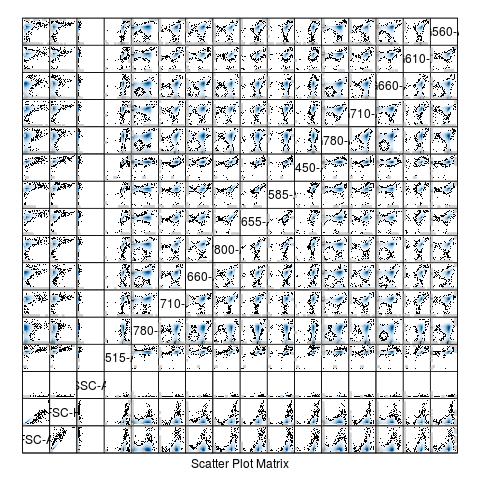

In [82]:
%%R
print(splom(trans_asinh))

In [83]:
%%R
head(comp_events, 2)

        FSC-A    FSC-H    SSC-A   B515-A    R780-A   R710-A   R660-A   V800-A
[1,] 27700.75 27291.75 177.5258 1979.934  114.5133 828.0222 290.6239 1050.024
[2,] 41264.25 39764.25 320.1230 3635.273 -100.7596 787.4441 880.9400 1711.337
        V655-A   V585-A   V450-A   G780-A   G710-A   G660-A   G610-A   G560-A
[1,]  730.7681 2363.405 2338.104 424.9302 442.5845 382.0551 1337.084 1002.129
[2,] 1445.4401 4394.542 4767.498 322.1310 460.8759 309.2898 1813.476 1123.020


In [84]:
%%R
head(trans_asinh, 2)

        FSC-A    FSC-H    SSC-A   B515-A    R780-A   R710-A   R660-A   V800-A
[1,] 27700.75 27291.75 177.5258 8.283966  5.433857 7.412187 6.365180 7.649716
[2,] 41264.25 39764.25 320.1230 8.891587 -5.305909 7.361940 7.474137 8.138178
       V655-A   V585-A   V450-A   G780-A   G710-A   G660-A   G610-A   G560-A
[1,] 7.287244 8.461006 8.450243 6.745073 6.785780 6.638714 7.891394 7.603030
[2,] 7.969316 9.081266 9.162724 6.468108 6.826277 6.427428 8.196148 7.716924


In [85]:
%%R
# B515-A
print(asinh(1979.934)) # 8.28396
print(asinh(3635.273)) # 8.891587

# R780-A
print(asinh(114.5133)) # 5.433857
print(asinh(-100.7596)) # -5.305909

[1] 8.283966
[1] 8.891587
[1] 5.433857
[1] -5.305909


# Compare Transformation

# Visualization

```
arcsinhTransform
asinhTrans <- arcsinhTransform(transformationId="ln-transformation", a=1, b=1, c=1)
translist <- transformList('FSC-H', asinhTrans)
dataTransform <- transform(samp, translist)
```

### Scatter plot

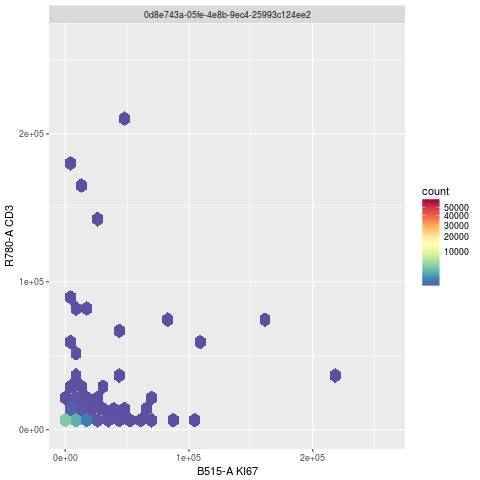

In [88]:
%%R
autoplot(fs, "B515-A", "R780-A")

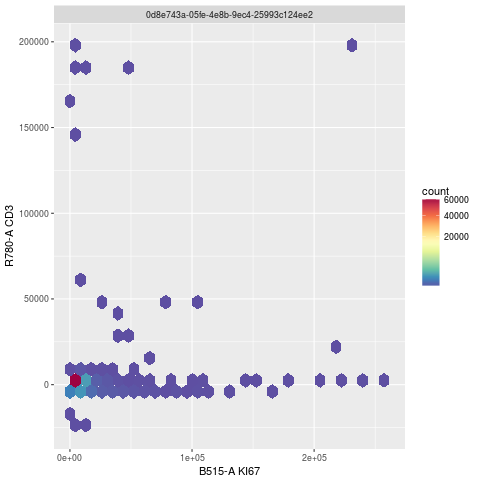

In [89]:
%%R
autoplot(comp_fs, "B515-A", "R780-A")

why there are negative values

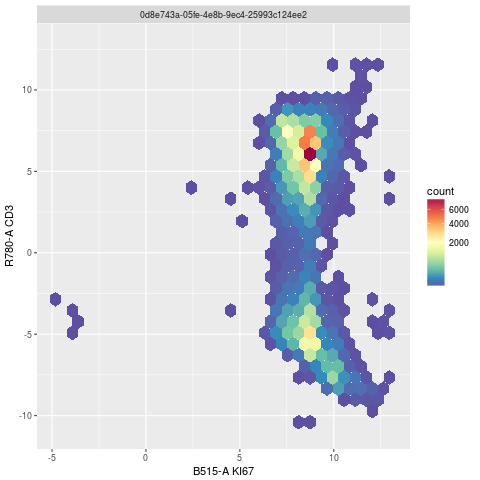

In [87]:
%%R
autoplot(trans_asinh, "B515-A", "R780-A")

### Heatmap

In [105]:
%%R
tmp <- exprs(trans_asinh)[, 4:16]
heatmap(tmp)


Error: cannot allocate vector of size 15.7 Gb


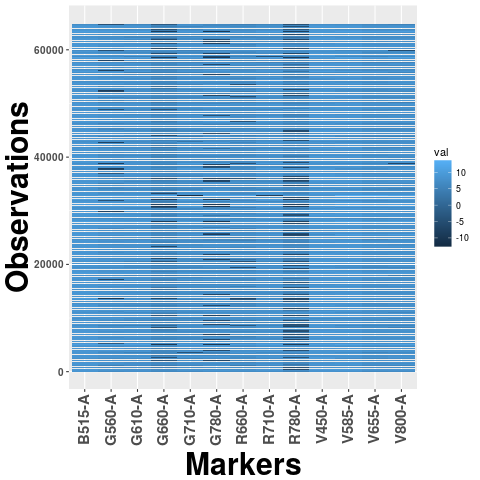

In [104]:
%%R
tmp <- exprs(trans_asinh)[, 4:16]
tmp <- as.data.frame(tmp)
tmp$ID <- 1:nrow(tmp)
tmp <- tmp %>% gather(var, val, -ID)
#head(tmp)
gp <- ggplot(tmp, aes(y = ID, x = var, fill = val)) + 
    geom_tile() + 
    xlab("Markers") +
    ylab("Observations") +
    theme(
        plot.title  = element_text(hjust = 0.5),
        axis.title  = element_text(size=30, face="bold"),
        axis.text.y = element_text(size=10, face="bold"),
        axis.text.x = element_text(size=15, face="bold",
            angle=90, hjust=1, vjust=0.4))
print(gp)

### Network

distance matrix